In [ ]:
#membuat akses ke google drive untuk load data

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd

%matplotlib inline

Japan Motor Vehicle Production: Toyota: Domestic data was reported at 280,365.000 Unit in Oct 2018. This records an increase from the previous number of 241,042.000 Unit for Sep 2018. Japan Motor Vehicle Production: Toyota: Domestic data is updated monthly, averaging 288,358.000 Unit from Jan 2001 to Oct 2018, with 214 observations. The data reached an all-time high of 412,990.000 Unit in Mar 2006 and a record low of 53,823.000 Unit in Apr 2011. Japan Motor Vehicle Production: Toyota: Domestic data remains active status in CEIC and is reported by Toyota Motor Corporation. The data is categorized under Global Database’s Japan – Table JP.B068: Production: Motor Vehicle: Toyota Motor Corporation.

Motor Vehicle Sales: Toyota: Domestic data was reported at 129,354.000 Unit in Sep 2018. This records an increase from the previous number of 110,899.000 Unit for Aug 2018. Motor Vehicle Sales: Toyota: Domestic data is updated monthly, averaging 128,080.000 Unit from Jan 2001 to Sep 2018, with 213 observations. The data reached an all-time high of 243,873.000 Unit in Mar 2006 and a record low of 37,332.000 Unit in Apr 2011. Motor Vehicle Sales: Toyota: Domestic data remains active status in CEIC and is reported by Toyota Motor Corporation. The data is categorized under Global Database’s Japan – Table JP.H027: Motor Vehicle Sales: Domestic: Toyota Motor Corporation.

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Forecasting_Metoper/Data_Toyota_Tokyo.csv")

In [ ]:
df.head()

,Produksi,Jual
0,250026,115297
1,224855,117547
2,282213,157675
3,270729,135745
4,231414,109686


# EDA

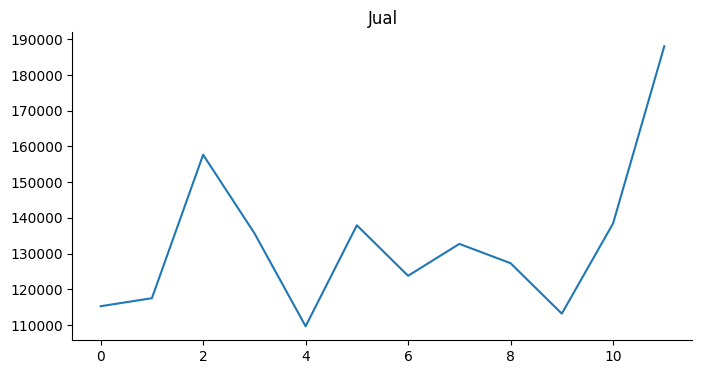

In [ ]:
# @title Jual

df['Jual'].plot(kind='line', figsize=(8, 4), title='Jual')
plt.gca().spines[['top', 'right']].set_visible(False)

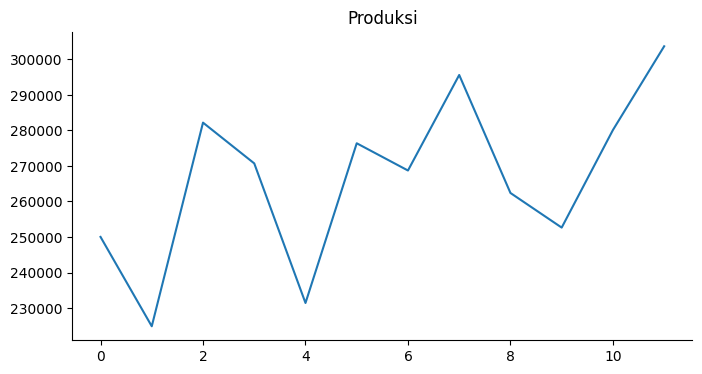

In [ ]:
# @title Produksi

df['Produksi'].plot(kind='line', figsize=(8, 4), title='Produksi')
plt.gca().spines[['top', 'right']].set_visible(False)

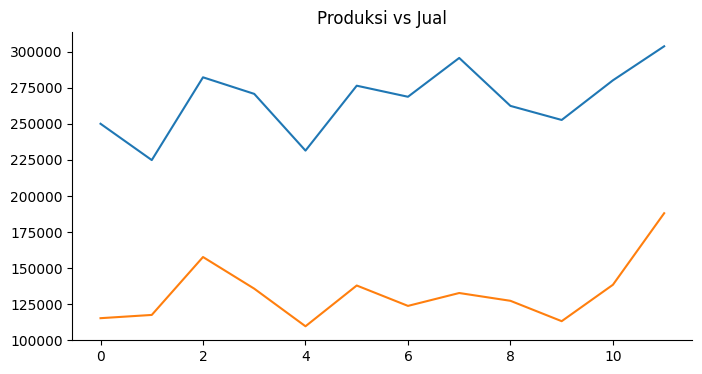

In [ ]:
# @title Produksi vs Jual

df['Produksi'].plot(kind='line', figsize=(8, 4), title='Produksi')
df['Jual'].plot(kind='line', figsize=(8, 4), title='Produksi vs Jual')
plt.gca().spines[['top', 'right']].set_visible(False)

# Feature Engginering

In [ ]:
df['Percentage'] = df['Jual']/df['Produksi']*100

In [ ]:
df

,Produksi,Jual,Percentage
0,250026,115297,46.114004
1,224855,117547,52.276801
2,282213,157675,55.870920
3,270729,135745,50.140546
4,231414,109686,47.398170
5,276398,137942,49.907018
6,268727,123809,46.072408
7,295631,132737,44.899554
8,262401,127334,48.526492
9,252649,113219,44.812764


In [ ]:
df.corr()

,Produksi,Jual,Percentage
Produksi,1.000000,0.798923,0.389386
Jual,0.798923,1.000000,0.863386
Percentage,0.389386,0.863386,1.000000


# Train Test Split

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [ ]:
adf_test(df['Jual'])

ADF Statistics: -1.7839590018521956
p- value: 0.3884541808604574
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [ ]:
## Use Techniques Differencing
df['Jual First Difference']=df['Jual']-df['Jual'].shift(1)

In [ ]:
adf_test(df['Jual First Difference'].dropna())

ADF Statistics: -2.7528952259396915
p- value: 0.0653237340773162
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [ ]:
## Use Techniques Differencing
df['Jual Second Difference']=df['Jual First Difference']-df['Jual First Difference'].shift(1)

In [ ]:
adf_test(df['Jual Second Difference'].dropna())

ADF Statistics: -4.3224556464218375
p- value: 0.00040607621921692506
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

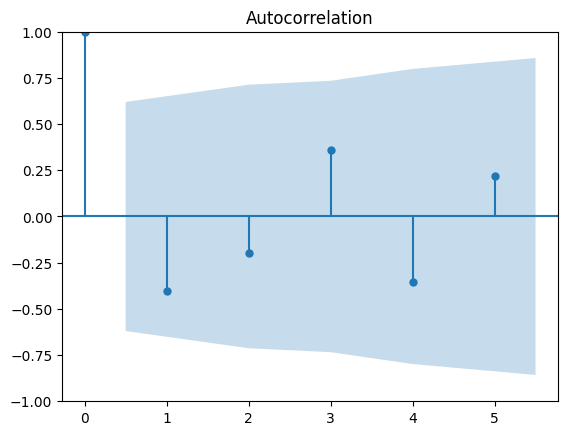

In [ ]:
acf = plot_acf(df["Jual Second Difference"].dropna())

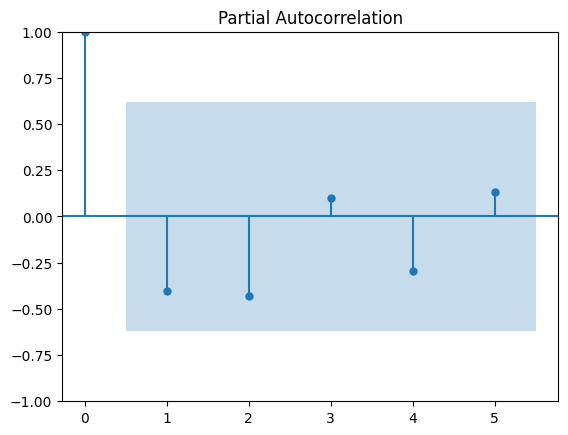

In [ ]:
result = plot_pacf(df["Jual Second Difference"].dropna())

In [ ]:
df

,Produksi,Jual,Percentage,Jual First Difference,Jual Second Difference
0,250026,115297,46.114004,NaN,NaN
1,224855,117547,52.276801,2250.0,NaN
2,282213,157675,55.870920,40128.0,37878.0
3,270729,135745,50.140546,-21930.0,-62058.0
4,231414,109686,47.398170,-26059.0,-4129.0
5,276398,137942,49.907018,28256.0,54315.0
6,268727,123809,46.072408,-14133.0,-42389.0
7,295631,132737,44.899554,8928.0,23061.0
8,262401,127334,48.526492,-5403.0,-14331.0
9,252649,113219,44.812764,-14115.0,-8712.0


In [ ]:
train_data=df[:7]
test_data=df[7:12]

In [ ]:
train_data

,Produksi,Jual,Percentage,Jual First Difference,Jual Second Difference
0,250026,115297,46.114004,NaN,NaN
1,224855,117547,52.276801,2250.0,NaN
2,282213,157675,55.870920,40128.0,37878.0
3,270729,135745,50.140546,-21930.0,-62058.0
4,231414,109686,47.398170,-26059.0,-4129.0
5,276398,137942,49.907018,28256.0,54315.0
6,268727,123809,46.072408,-14133.0,-42389.0


In [ ]:
test_data

,Produksi,Jual,Percentage,Jual First Difference,Jual Second Difference
7,295631,132737,44.899554,8928.0,23061.0
8,262401,127334,48.526492,-5403.0,-14331.0
9,252649,113219,44.812764,-14115.0,-8712.0
10,280133,138453,49.424024,25234.0,39349.0
11,303715,188027,61.909027,49574.0,24340.0


# Arima Modelling

In [ ]:
model_ARIMA= sms.tsa.arima.ARIMA(train_data['Jual'],order=(1,2,1))

In [ ]:
model_Arima_fit=model_ARIMA.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   Jual   No. Observations:                    7
Model:                 ARIMA(1, 2, 1)   Log Likelihood             -106980.580
Date:                Tue, 20 Feb 2024   AIC                         213967.160
Time:                        00:50:29   BIC                         213965.988
Sample:                             0   HQIC                        213964.015
                                  - 7                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3819    1.9e-05  -2.01e+04      0.000      -0.382      -0.382
ma.L1         -0.9986      0.013    -77.399      0.000      -1.024      -0.973
sigma2      1.506e+04    194.150     77.566      0.000    1.47e+04    1.54e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.47   Jarque-Bera (JB):                 0.53
Prob(Q):                              0.49   Prob(JB):                         0.77
Heteroskedasticity (H):               0.25   Skew:                            -0.14
Prob(H) (two-sided):                  0.40   Kurtosis:                         1.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
pred=model_Arima_fit.predict(start=7,end=11)
residuals=test_data['Jual']-pred

In [ ]:
pred

7     132503.673968
8     132479.456552
9     135785.366729
10    137819.354904
11    140339.145961
Name: predicted_mean, dtype: float64

In [ ]:
residuals

7       233.326032
8     -5145.456552
9    -22566.366729
10      633.645096
11    47687.854039
dtype: float64

<Axes: ylabel='Density'>

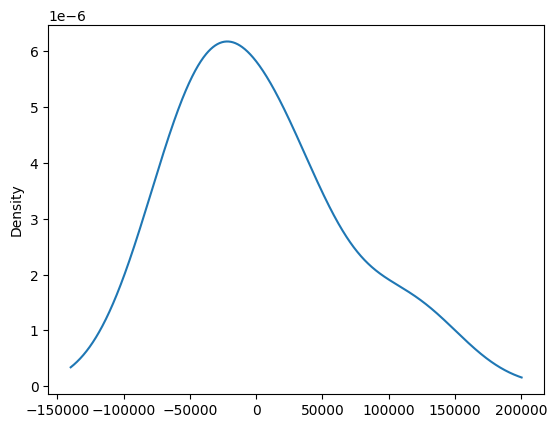

In [ ]:
model_Arima_fit.resid.plot(kind='kde')

In [ ]:
test_data['Predicted_ARIMA']=pred

<ipython-input-46-69896c9f46c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA']=pred


<Axes: >

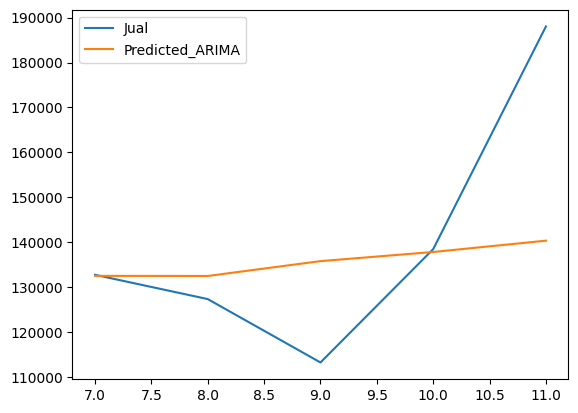

In [ ]:
test_data[['Jual','Predicted_ARIMA']].plot()

In [ ]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 15.6 MB/s eta 0:00:00


In [ ]:
import pmdarima as pm
# use pmdarima to automatically select best ARIMA model
model = pm.auto_arima(train_data['Jual'],
                      m=3,               # frequency of series
                      seasonal=True,  # TRUE if seasonal series
                      d=None,             # let model determine 'd'
                      test='adf',         # use adftest to find optimal 'd'
                      start_p=0, start_q=0, # minimum p and q
                      max_p=3, max_q=3, # maximum p and q
                      D=None,             # let model determine 'D'
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)

ValueError: zero-size array to reduction operation maximum which has no identity

In [ ]:
# print model summary
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    7
Model:                        SARIMAX   Log Likelihood                 -77.433
Date:                Mon, 19 Feb 2024   AIC                            158.865
Time:                        17:08:10   BIC                            158.757
Sample:                             0   HQIC                           157.528
                                  - 7                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.282e+05   7104.980     18.050      0.000    1.14e+05    1.42e+05
sigma2      2.375e+08   1.89e+08      1.254      0.210   -1.34e+08    6.09e+08
Ljung-Box (L1) (Q):                   0.38   Jarque-

In [ ]:
from pandas.plotting import autocorrelation_plot

NameError: name 'pyplot' is not defined

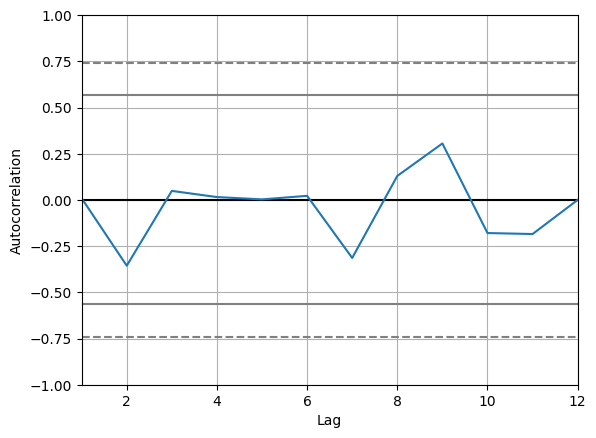

In [ ]:
autocorrelation_plot(df['Jual'])
pyplot.show()